In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
meantemp = pd.read_csv('DataTemp/Data01mean/Tempdatamean.csv',index_col = 1 , parse_dates=True)
maxtemp = pd.read_csv('DataTemp/Data03max/TX_STAID002759.txt',index_col = 1 , parse_dates=True, skiprows = 19)
mintemp = pd.read_csv('DataTemp/Data02min/TN_STAID002759.txt',index_col = 1 , parse_dates=True, skiprows = 19)

In [3]:
meantemp.rename(columns={'   TG' : 'meantemperature'}, inplace=True)
maxtemp.rename(columns={'   TX' : 'maxtemperature'}, inplace=True)
mintemp.rename(columns={'   TN' : 'mintemperature'}, inplace=True)

In [4]:
meantemp.rename_axis('Date',inplace=True)
maxtemp.rename_axis('Date',inplace=True)
mintemp.rename_axis('Date',inplace=True)

In [5]:
meantemp['meantemperature'] = meantemp['meantemperature'] *0.1
maxtemp['maxtemperature'] = maxtemp['maxtemperature'] *0.1
mintemp['mintemperature'] = mintemp['mintemperature'] *0.1

In [6]:
wmean = meantemp['1946-01-01':]
wmax = maxtemp['1946-01-01':]
wmin = mintemp['1946-01-01':]

In [7]:
wmean.drop([' SOUID',' Q_TG'],axis=1, inplace=True)
wmax.drop([' SOUID',' Q_TX'],axis=1, inplace=True)
wmin.drop([' SOUID',' Q_TN'],axis=1, inplace=True)

C:\Users\aoe\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
meantest = wmean[-20:]
maxtest = wmax[-20:]
mintest = wmin[-20:]

In [9]:
wmean = wmean[:-20]
wmax = wmax[:-20]
wmin = wmin[:-20]

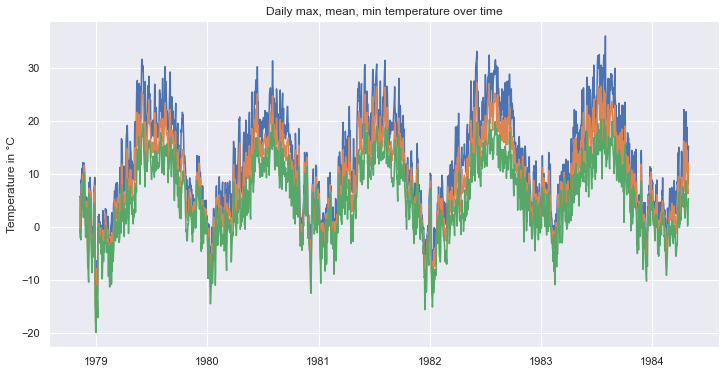

In [10]:
plt.title("Daily max, mean, min temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(wmax.index[12000:14000],wmax['maxtemperature'][12000:14000])
plt.plot(wmean.index[12000:14000],wmean['meantemperature'][12000:14000])
plt.plot(wmin.index[12000:14000],wmin['mintemperature'][12000:14000])

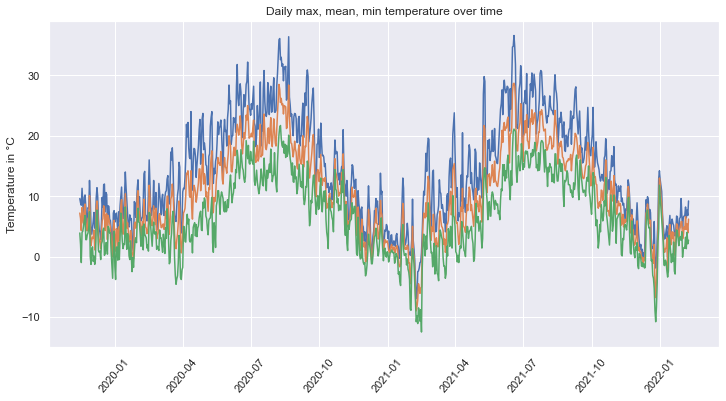

In [11]:
plt.title("Daily max, mean, min temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wmax['2019-11-15':'2022-02-25'])
plt.plot(wmean['2019-11-15':'2022-02-25'])
plt.plot(wmin['2019-11-15':'2022-02-25'])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
wmean['timestep'] = range(len(wmean))
wmax['timestep'] = range(len(wmax))
wmin['timestep'] = range(len(wmin))

In [14]:
Xmax = wmax[['timestep']] # matrix (or DataFrame)
ymax = wmax['maxtemperature'] # vector (or Series)
Xmean = wmean[['timestep']] # matrix (or DataFrame)
ymean = wmean['meantemperature'] # vector (or Series)
Xmin = wmin[['timestep']] # matrix (or DataFrame)
ymin = wmin['mintemperature'] # vector (or Series)

In [15]:
mx = LinearRegression()
mn = LinearRegression()
me = LinearRegression()

In [16]:
mx.fit(Xmax, ymax)
mn.fit(Xmin, ymin)
me.fit(Xmean, ymean)

LinearRegression()

In [17]:
wmax['trend'] = mx.predict(Xmax)
wmin['trend'] = mn.predict(Xmin)
wmean['trend'] = me.predict(Xmean)

<AxesSubplot:xlabel='Date'>

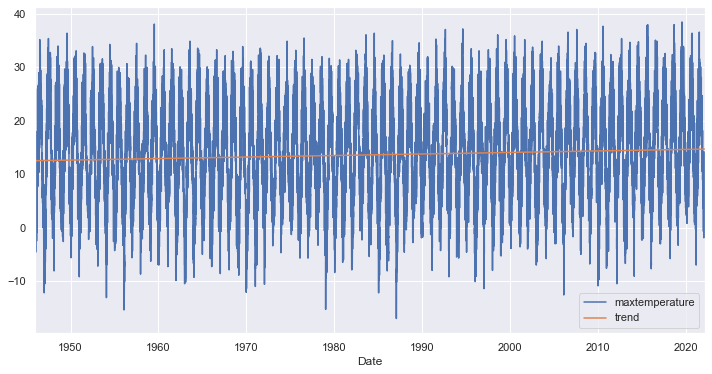

In [18]:
wmax[['maxtemperature', 'trend']].plot()

<AxesSubplot:xlabel='Date'>

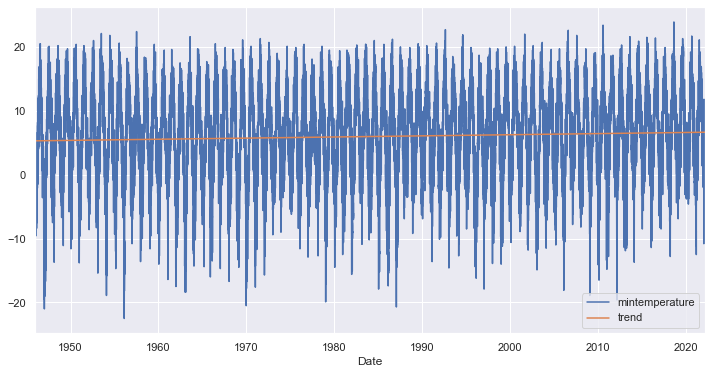

In [19]:
wmin[['mintemperature', 'trend']].plot()

<AxesSubplot:xlabel='Date'>

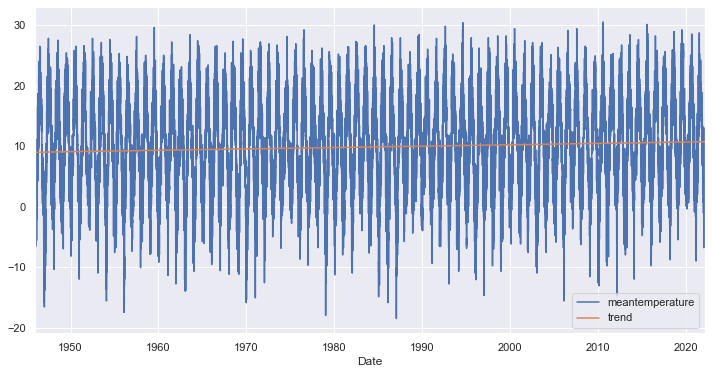

In [20]:
wmean[['meantemperature', 'trend']].plot()

In [21]:
wmax['wo_trend'] = wmax['maxtemperature'] - wmax['trend']
wmin['wo_trend'] = wmin['mintemperature'] - wmin['trend']
wmean['wo_trend'] = wmean['meantemperature'] - wmean['trend']

In [22]:
# One-Hot-Encoding the day
maxseasonal_dummies = pd.get_dummies(wmax.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmax.index)
meanseasonal_dummies = pd.get_dummies(wmean.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmean.index)
minseasonal_dummies = pd.get_dummies(wmin.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wmin.index)

In [23]:
# join the dummies with the flights data frame
wmax = wmax.join(maxseasonal_dummies)
wmean = wmean.join(meanseasonal_dummies)
wmin = wmin.join(minseasonal_dummies)

In [24]:
Xmx = wmax.drop(columns=['maxtemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies
Xme = wmean.drop(columns=['meantemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies
Xmn = wmin.drop(columns=['mintemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

In [25]:
mx.fit(Xmx, ymax)
mn.fit(Xme, ymean)
me.fit(Xmn, ymin)
# Create a model with trend and seasonality
wmax['trend + seasonal'] = mx.predict(Xmx)
wmin['trend + seasonal'] = mn.predict(Xmn)
wmean['trend + seasonal'] = me.predict(Xme)

<AxesSubplot:xlabel='Date'>

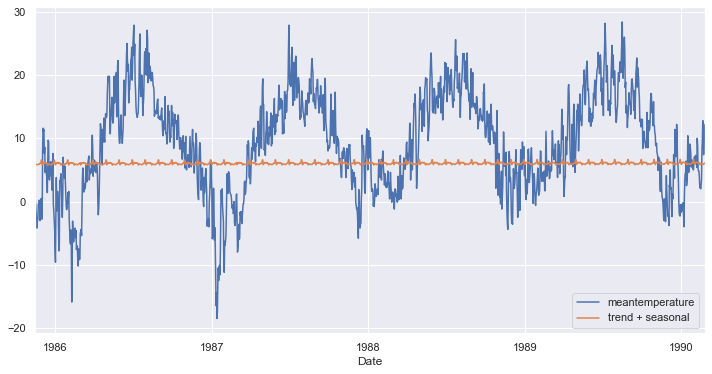

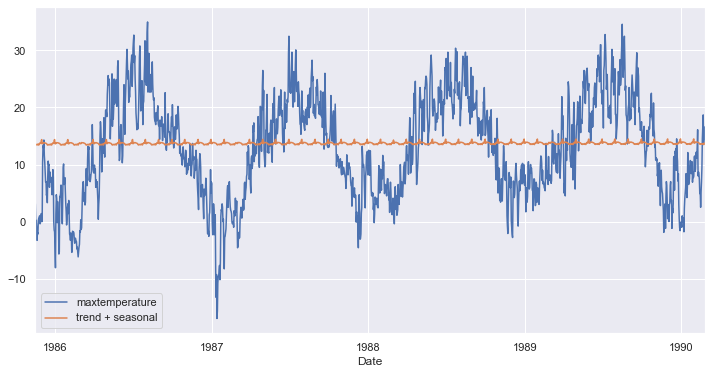

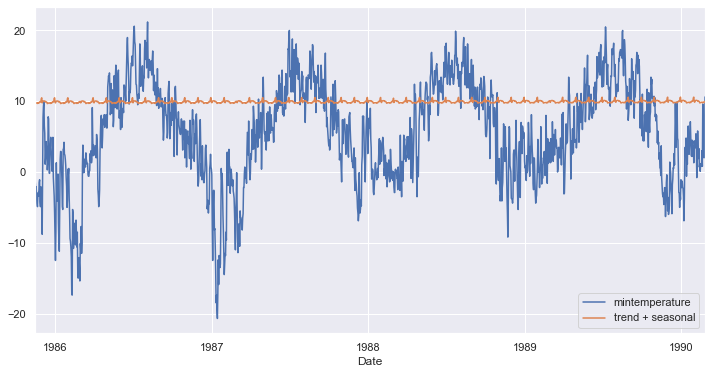

In [26]:
wmean['1985-11-15':'1990-02-25'][['meantemperature', 'trend + seasonal']].plot()
wmax['1985-11-15':'1990-02-25'][['maxtemperature', 'trend + seasonal']].plot()
wmin['1985-11-15':'1990-02-25'][['mintemperature', 'trend + seasonal']].plot()

In [27]:
wmax['remainder'] = wmax['maxtemperature'] - wmax['trend + seasonal']
wmin['remainder'] = wmin['mintemperature'] - wmin['trend + seasonal']
wmean['remainder'] = wmean['meantemperature'] - wmean['trend + seasonal']

<AxesSubplot:xlabel='Date'>

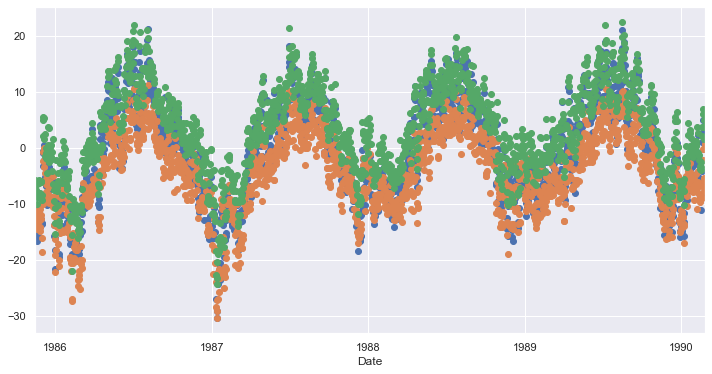

In [28]:
wmax['1985-11-15':'1990-02-25']['remainder'].plot(style='o')
wmin['1985-11-15':'1990-02-25']['remainder'].plot(style='o')
wmean['1985-11-15':'1990-02-25']['remainder'].plot(style='o')

In [29]:
wmax.columns

Index(['maxtemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal', 'remainder'],
      dtype='object')

In [30]:
rmax = wmax.drop(columns=['maxtemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])
rmin = wmin.drop(columns=['mintemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])
rmean = wmean.drop(columns=['meantemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])


In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

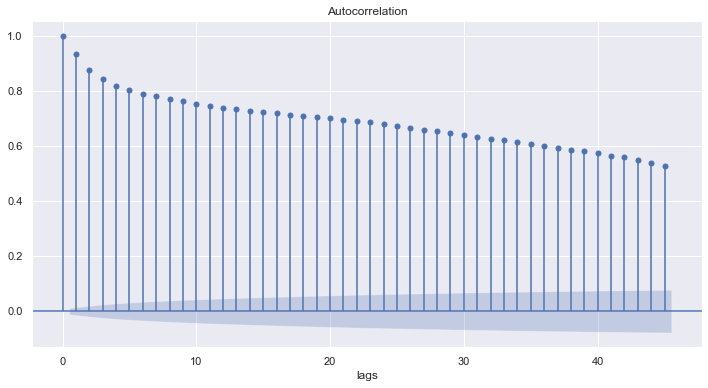

In [32]:
plot_acf(rmin['remainder'])
plt.xlabel('lags');

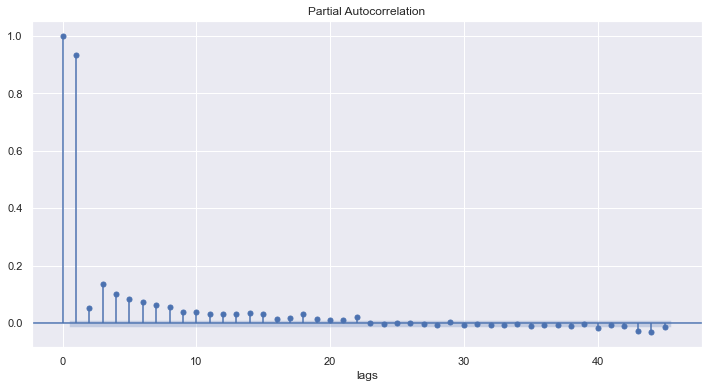

In [33]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function

plot_pacf(rmin['remainder'])
plt.xlabel('lags');

In [34]:
selected_order = ar_select_order(rmean['remainder'], maxlag = 22)
selected_order.ar_lags

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [35]:
Nmax = wmax.drop(columns=['trend', 'wo_trend','trend + seasonal'])
Nmin = wmin.drop(columns=['trend', 'wo_trend','trend + seasonal'])
Nmean = wmean.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [36]:
Nmax['lag1'] = Nmax['remainder'].shift(1)
Nmax['lag2'] = Nmax['remainder'].shift(2)
Nmax['lag3'] = Nmax['remainder'].shift(3)
Nmax['lag4'] = Nmax['remainder'].shift(4)
Nmax['lag5'] = Nmax['remainder'].shift(5)
Nmax['lag6'] = Nmax['remainder'].shift(6)
Nmax['lag7'] = Nmax['remainder'].shift(7)
Nmax['lag8'] = Nmax['remainder'].shift(8)
Nmax['lag9'] = Nmax['remainder'].shift(9)
Nmax['lag10'] = Nmax['remainder'].shift(10)
Nmax['lag11'] = Nmax['remainder'].shift(11)
Nmax['lag12'] = Nmax['remainder'].shift(12)
Nmax['lag13'] = Nmax['remainder'].shift(13)
Nmax['lag14'] = Nmax['remainder'].shift(14)
Nmax['lag15'] = Nmax['remainder'].shift(15)
Nmax['lag16'] = Nmax['remainder'].shift(16)
Nmax['lag17'] = Nmax['remainder'].shift(17)
Nmax['lag18'] = Nmax['remainder'].shift(18)

Nmin['lag1'] = Nmin['remainder'].shift(1)
Nmin['lag2'] = Nmin['remainder'].shift(2)
Nmin['lag3'] = Nmin['remainder'].shift(3)
Nmin['lag4'] = Nmin['remainder'].shift(4)
Nmin['lag5'] = Nmin['remainder'].shift(5)
Nmin['lag6'] = Nmin['remainder'].shift(6)
Nmin['lag7'] = Nmin['remainder'].shift(7)
Nmin['lag8'] = Nmin['remainder'].shift(8)
Nmin['lag9'] = Nmin['remainder'].shift(9)
Nmin['lag10'] = Nmin['remainder'].shift(10)
Nmin['lag11'] = Nmin['remainder'].shift(11)
Nmin['lag12'] = Nmin['remainder'].shift(12)
Nmin['lag13'] = Nmin['remainder'].shift(13)
Nmin['lag14'] = Nmin['remainder'].shift(14)
Nmin['lag15'] = Nmin['remainder'].shift(15)
Nmin['lag16'] = Nmin['remainder'].shift(16)
Nmin['lag17'] = Nmin['remainder'].shift(17)
Nmin['lag18'] = Nmin['remainder'].shift(18)

Nmean['lag1'] = Nmean['remainder'].shift(1)
Nmean['lag2'] = Nmean['remainder'].shift(2)
Nmean['lag3'] = Nmean['remainder'].shift(3)
Nmean['lag4'] = Nmean['remainder'].shift(4)
Nmean['lag5'] = Nmean['remainder'].shift(5)
Nmean['lag6'] = Nmean['remainder'].shift(6)
Nmean['lag7'] = Nmean['remainder'].shift(7)
Nmean['lag8'] = Nmean['remainder'].shift(8)
Nmean['lag9'] = Nmean['remainder'].shift(9)
Nmean['lag10'] = Nmean['remainder'].shift(10)
Nmean['lag11'] = Nmean['remainder'].shift(11)
Nmean['lag12'] = Nmean['remainder'].shift(12)
Nmean['lag13'] = Nmean['remainder'].shift(13)
Nmean['lag14'] = Nmean['remainder'].shift(14)
Nmean['lag15'] = Nmean['remainder'].shift(15)
Nmean['lag16'] = Nmean['remainder'].shift(16)
Nmean['lag17'] = Nmean['remainder'].shift(17)


In [37]:
Nmax.dropna(inplace = True)
Nmin.dropna(inplace = True)
Nmean.dropna(inplace = True)

In [38]:
Xmx = Nmax.drop(columns=['maxtemperature','remainder']) # matrix (or DataFrame)
ymx = Nmax['maxtemperature'] # vector (or Series
Xme = Nmean.drop(columns=['meantemperature','remainder']) # matrix (or DataFrame)
yme = Nmean['meantemperature'] # vector (or Series
Xmn = Nmin.drop(columns=['mintemperature','remainder']) # matrix (or DataFrame)
ymn = Nmin['mintemperature'] # vector (or Series

In [39]:
mxf = LinearRegression()
mxf.fit(Xmx, ymx)
mef = LinearRegression()
mef.fit(Xme, yme)
mnf = LinearRegression()
mnf.fit(Xmn, ymn)

LinearRegression()

In [40]:
Nmax['max_predict'] = mxf.predict(Xmx)
Nmean['mean_predict'] = mef.predict(Xme)
Nmin['min_predict'] = mnf.predict(Xmn)

In [41]:
pltframe = Nmax[['maxtemperature','max_predict']].join(Nmin[['mintemperature','min_predict']])
pltframe

,maxtemperature,max_predict,mintemperature,min_predict
Date,,,,
1946-01-19,1.4,-0.509725,-5.3,-7.855842
1946-01-20,-0.4,1.934664,-5.1,-4.568501
1946-01-21,-2.4,0.159852,-9.4,-4.810243
1946-01-22,-1.9,-1.467544,-9.1,-8.373182
1946-01-23,-0.7,-0.985137,-6.2,-7.758757
...,...,...,...,...
2022-02-04,8.2,6.815878,3.2,1.629719
2022-02-05,6.4,8.082729,1.3,2.986711
2022-02-06,7.7,6.380783,4.0,1.500453


In [42]:
pltframe = pltframe.join(Nmean[['meantemperature','mean_predict']])
pltframe

,maxtemperature,max_predict,mintemperature,min_predict,meantemperature,mean_predict
Date,,,,,,
1946-01-19,1.4,-0.509725,-5.3,-7.855842,-1.3,-2.981304
1946-01-20,-0.4,1.934664,-5.1,-4.568501,-3.3,-0.610914
1946-01-21,-2.4,0.159852,-9.4,-4.810243,-5.8,-3.121739
1946-01-22,-1.9,-1.467544,-9.1,-8.373182,-4.4,-5.038083
1946-01-23,-0.7,-0.985137,-6.2,-7.758757,-3.0,-3.296072
...,...,...,...,...,...,...
2022-02-04,8.2,6.815878,3.2,1.629719,6.6,4.383567
2022-02-05,6.4,8.082729,1.3,2.986711,4.5,6.668898
2022-02-06,7.7,6.380783,4.0,1.500453,5.4,4.156510


<AxesSubplot:xlabel='Date'>

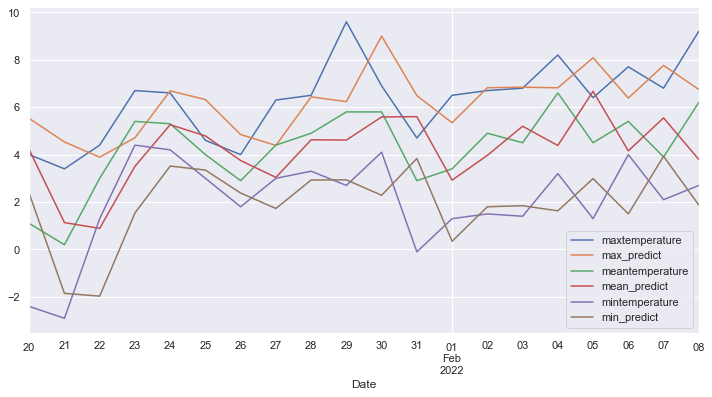

In [43]:
pltframe['2022-01-20':'2022-03-01'][['maxtemperature', 'max_predict','meantemperature','mean_predict','mintemperature','min_predict']].plot()

In [44]:
from statsmodels.tsa import stattools

In [45]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=1; CI=99%) 
            {round(levels['5%'],2)} (p=5; CI=95%)
            {round(levels['10%'],2)} (p=10 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)

In [46]:
statmax = wmax['remainder']
statmin = wmin['remainder']
statmean = wmean['remainder']

In [47]:
statmax.head(4)

Date
1946-01-01   -14.186539
1946-01-02   -13.261703
1946-01-03   -13.805029
1946-01-04   -14.660062
Name: remainder, dtype: float64

In [48]:
print_adf(statmean)

   
            adf: -13.06
            p: 2.0543198258362108e-24 
            used lag: 49 
            number of observations: 27748
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 124564.73203001321
            


In [49]:
print_adf(statmax)

   
            adf: -13.11
            p: 1.6505807078703247e-24 
            used lag: 49 
            number of observations: 27748
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 137613.49329909234
            


In [50]:
print_adf(statmin)

   
            adf: -12.76
            p: 8.144394716569715e-24 
            used lag: 49 
            number of observations: 27748
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 128477.03751195269
            


In [51]:
Nmax.tail()

,maxtemperature,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,max_predict
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-04,8.2,27793,0,0,1,0,0,0,0,0,...,-10.081540,-8.049010,-7.741562,-10.167849,-11.224585,-10.500379,-9.265878,-9.052844,-8.356020,6.815878
2022-02-05,6.4,27794,0,0,0,1,0,0,0,0,...,-10.842329,-10.081540,-8.049010,-7.741562,-10.167849,-11.224585,-10.500379,-9.265878,-9.052844,8.082729
2022-02-06,7.7,27795,0,0,0,0,1,0,0,0,...,-8.433567,-10.842329,-10.081540,-8.049010,-7.741562,-10.167849,-11.224585,-10.500379,-9.265878,6.380783
2022-02-07,6.8,27796,0,0,0,0,0,1,0,0,...,-8.240577,-8.433567,-10.842329,-10.081540,-8.049010,-7.741562,-10.167849,-11.224585,-10.500379,7.759968
2022-02-08,9.2,27797,0,0,0,0,0,0,1,0,...,-5.664959,-8.240577,-8.433567,-10.842329,-10.081540,-8.049010,-7.741562,-10.167849,-11.224585,6.746306


In [52]:
Nmean.tail()

,meantemperature,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,mean_predict
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-04,6.6,27793,0,0,1,0,0,0,0,0,...,-3.734115,-2.677598,-1.240249,-1.122505,-3.452516,-6.269493,-5.342768,-2.516043,-3.529405,4.383567
2022-02-05,4.5,27794,0,0,0,1,0,0,0,0,...,-2.263688,-3.734115,-2.677598,-1.240249,-1.122505,-3.452516,-6.269493,-5.342768,-2.516043,6.668898
2022-02-06,5.4,27795,0,0,0,0,1,0,0,0,...,-1.867631,-2.263688,-3.734115,-2.677598,-1.240249,-1.122505,-3.452516,-6.269493,-5.342768,4.156510
2022-02-07,3.9,27796,0,0,0,0,0,1,0,0,...,-1.423783,-1.867631,-2.263688,-3.734115,-2.677598,-1.240249,-1.122505,-3.452516,-6.269493,5.547966
2022-02-08,6.2,27797,0,0,0,0,0,0,1,0,...,-1.373141,-1.423783,-1.867631,-2.263688,-3.734115,-2.677598,-1.240249,-1.122505,-3.452516,3.795891


In [53]:
Nmin.tail()

,mintemperature,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,min_predict
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-04,3.2,27793,0,0,1,0,0,0,0,0,...,-7.713772,-6.452436,-6.133597,-9.272479,-13.499643,-12.903148,-8.157912,-11.368975,-10.186718,1.629719
2022-02-05,1.3,27794,0,0,0,1,0,0,0,0,...,-8.969851,-7.713772,-6.452436,-6.133597,-9.272479,-13.499643,-12.903148,-8.157912,-11.368975,2.986711
2022-02-06,4.0,27795,0,0,0,0,1,0,0,0,...,-7.712786,-8.969851,-7.713772,-6.452436,-6.133597,-9.272479,-13.499643,-12.903148,-8.157912,1.500453
2022-02-07,2.1,27796,0,0,0,0,0,1,0,0,...,-7.485842,-7.712786,-8.969851,-7.713772,-6.452436,-6.133597,-9.272479,-13.499643,-12.903148,3.928946
2022-02-08,2.7,27797,0,0,0,0,0,0,1,0,...,-8.502630,-7.485842,-7.712786,-8.969851,-7.713772,-6.452436,-6.133597,-9.272479,-13.499643,1.874387


In [54]:
meantest['remainder'] = 0
maxtest['remainder'] = 0
mintest['remainder'] = 0

In [55]:
predictnomax = Nmax.append(maxtest)
predictnomean = Nmean.append(meantest)
predictnomin = Nmin.append(mintest)

In [86]:
predictmax = predictnomax.drop(columns=['maxtemperature', 'timestep', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10',
       'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18',
       'max_predict'])
predictmin = predictnomin.drop(columns=['mintemperature', 'timestep', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10',
       'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18',
       'min_predict'])
predictmean = predictnomean.drop(columns=['meantemperature', 'timestep', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10',
       'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'lag16', 'lag17',
       'mean_predict'])

In [87]:
predictmax['timestep'] = range(len(predictmax))
predictmin['timestep'] = range(len(predictmin))
predictmean['timestep'] = range(len(predictmean))

In [88]:
# One-Hot-Encoding the day
maxseasonal_dummies = pd.get_dummies(predictmax.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(predictmax.index)
meanseasonal_dummies = pd.get_dummies(predictmean.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(predictmean.index)
minseasonal_dummies = pd.get_dummies(predictmin.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(predictmin.index)

In [89]:
# join the dummies with the flights data frame
predictmax = predictmax.join(maxseasonal_dummies)
predictmin = predictmin.join(minseasonal_dummies)
predictmean = predictmean.join(meanseasonal_dummies)

In [90]:
predictmax['lag1'] = predictmax['remainder'].shift(1)
predictmax['lag2'] = predictmax['remainder'].shift(2)
predictmax['lag3'] = predictmax['remainder'].shift(3)
predictmax['lag4'] = predictmax['remainder'].shift(4)
predictmax['lag5'] = predictmax['remainder'].shift(5)
predictmax['lag6'] = predictmax['remainder'].shift(6)
predictmax['lag7'] = predictmax['remainder'].shift(7)
predictmax['lag8'] = predictmax['remainder'].shift(8)
predictmax['lag9'] = predictmax['remainder'].shift(9)
predictmax['lag10'] = predictmax['remainder'].shift(10)
predictmax['lag11'] = predictmax['remainder'].shift(11)
predictmax['lag12'] = predictmax['remainder'].shift(12)
predictmax['lag13'] = predictmax['remainder'].shift(13)
predictmax['lag14'] = predictmax['remainder'].shift(14)
predictmax['lag15'] = predictmax['remainder'].shift(15)
predictmax['lag16'] = predictmax['remainder'].shift(16)
predictmax['lag17'] = predictmax['remainder'].shift(17)
predictmax['lag18'] = predictmax['remainder'].shift(18)

predictmin['lag1'] = predictmin['remainder'].shift(1)
predictmin['lag2'] = predictmin['remainder'].shift(2)
predictmin['lag3'] = predictmin['remainder'].shift(3)
predictmin['lag4'] = predictmin['remainder'].shift(4)
predictmin['lag5'] = predictmin['remainder'].shift(5)
predictmin['lag6'] = predictmin['remainder'].shift(6)
predictmin['lag7'] = predictmin['remainder'].shift(7)
predictmin['lag8'] = predictmin['remainder'].shift(8)
predictmin['lag9'] = predictmin['remainder'].shift(9)
predictmin['lag10'] = predictmin['remainder'].shift(10)
predictmin['lag11'] = predictmin['remainder'].shift(11)
predictmin['lag12'] = predictmin['remainder'].shift(12)
predictmin['lag13'] = predictmin['remainder'].shift(13)
predictmin['lag14'] = predictmin['remainder'].shift(14)
predictmin['lag15'] = predictmin['remainder'].shift(15)
predictmin['lag16'] = predictmin['remainder'].shift(16)
predictmin['lag17'] = predictmin['remainder'].shift(17)
predictmin['lag18'] = predictmin['remainder'].shift(18)

predictmean['lag1'] = predictmean['remainder'].shift(1)
predictmean['lag2'] = predictmean['remainder'].shift(2)
predictmean['lag3'] = predictmean['remainder'].shift(3)
predictmean['lag4'] = predictmean['remainder'].shift(4)
predictmean['lag5'] = predictmean['remainder'].shift(5)
predictmean['lag6'] = predictmean['remainder'].shift(6)
predictmean['lag7'] = predictmean['remainder'].shift(7)
predictmean['lag8'] = predictmean['remainder'].shift(8)
predictmean['lag9'] = predictmean['remainder'].shift(9)
predictmean['lag10'] = predictmean['remainder'].shift(10)
predictmean['lag11'] = predictmean['remainder'].shift(11)
predictmean['lag12'] = predictmean['remainder'].shift(12)
predictmean['lag13'] = predictmean['remainder'].shift(13)
predictmean['lag14'] = predictmean['remainder'].shift(14)
predictmean['lag15'] = predictmean['remainder'].shift(15)
predictmean['lag16'] = predictmean['remainder'].shift(16)
predictmean['lag17'] = predictmean['remainder'].shift(17)


In [91]:
predictmax = predictmax.drop(columns=['remainder'])
predictmin = predictmin.drop(columns=['remainder'])
predictmean = predictmean.drop(columns=['remainder'])

In [92]:
predictmax.dropna(inplace = True)
predictmin.dropna(inplace = True)
predictmean.dropna(inplace = True)

In [93]:
predictmax['predictionmax_days'] = mxf.predict(predictmax)
predictmin['predictionmin_days'] = mnf.predict(predictmin)
predictmean['predictionmean_days'] = mef.predict(predictmean)

In [96]:
predictmax.tail(3)

,timestep,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,predictionmax_days
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-26,27797,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.583546,14.690433
2022-02-27,27798,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.729150
2022-02-28,27799,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.736160


In [97]:
newmax = predictmax.join(predictnomax[['maxtemperature','max_predict']])
newmin = predictmin.join(predictnomin[['mintemperature','min_predict']])
newmean = predictmean.join(predictnomean[['meantemperature','mean_predict']])

In [103]:
pltframe = newmax[['maxtemperature','predictionmax_days']].join(newmin[['mintemperature','predictionmin_days']])
pltframe = pltframe.join(newmean[['meantemperature','predictionmean_days']])
pltframe

,maxtemperature,predictionmax_days,mintemperature,predictionmin_days,meantemperature,predictionmean_days
Date,,,,,,
1946-02-06,5.9,5.773248,3.3,2.053773,4.1,4.755004
1946-02-07,5.4,5.847703,0.4,2.654903,4.2,3.630891
1946-02-08,9.0,5.356705,3.9,0.033998,5.0,4.041269
1946-02-09,4.7,8.527093,1.6,3.224922,2.9,4.862139
1946-02-10,6.0,4.504192,-1.4,1.220476,2.7,2.496964
...,...,...,...,...,...,...
2022-02-24,10.3,14.389694,1.2,10.269771,5.9,6.649293
2022-02-25,7.5,14.442625,2.1,10.466058,4.4,6.660198
2022-02-26,6.7,14.690433,-0.2,10.304336,4.1,6.827006


<AxesSubplot:xlabel='Date'>

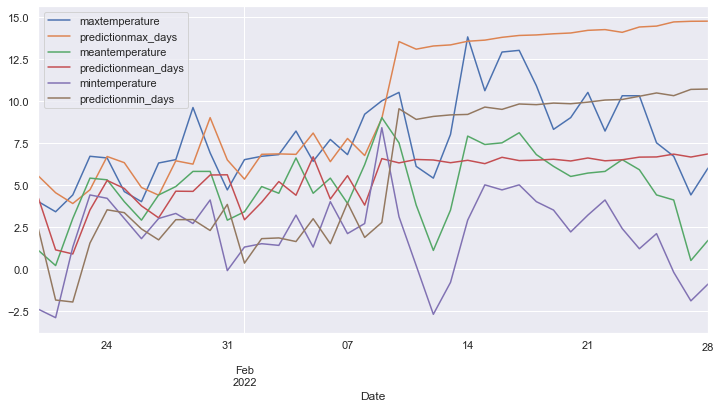

In [104]:
pltframe['2022-01-20':'2022-03-18'][['maxtemperature', 'predictionmax_days','meantemperature','predictionmean_days','mintemperature','predictionmin_days']].plot()